In [1]:
from food_dataset import FoodDataset
from food_model import FoodModel_1, FoodModel_2
from train_settings import TrainSettings
from training_loop import TrainingLoop
import constants
from matplotlib import pyplot as plt
from train_logic import TrainLogic, TrainLogicImplementation, MockTrainLogic
from torchvision import transforms


In [2]:
path=constants.dataset_root

transforms_tr = constants.transforms_tr
transforms_val = constants.transforms_test

dt_train = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       10,
                       transforms_tr)

dt_original = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       10,
                       transforms.ToTensor())

dt_val = FoodDataset(path,
                     constants.min_class_names,
                     constants.min_class_labels,
                     10,
                     5,
                     transforms_val)

dt_test = FoodDataset(path,
                      constants.min_class_names,
                      constants.min_class_labels,
                      10,
                      5,
                      transforms_val)

In [3]:
dt_train[0][0].shape

torch.Size([3, 256, 256])

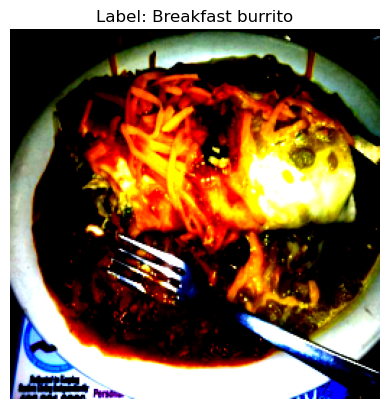

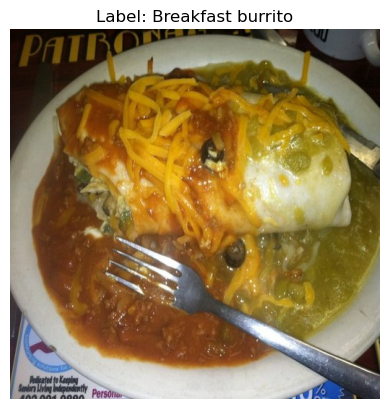

In [4]:
import numpy as np
import random
rand_idx = random.randint(0, len(dt_train))
def plot_normalized_image(image, label):
    # Denormalize the image tensor (assuming it was normalized with mean and std)
    image = image.permute(1, 2, 0)
    image = image.clip(0, 1)  # Ensure values are in the range [0, 1]
    
    
    plt.figure()
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Example usage
plot_normalized_image(dt_train[rand_idx][0], dt_train.get_class_label(dt_train[rand_idx][1]))
plot_normalized_image(dt_original[rand_idx][0], dt_original.get_class_label(dt_original[rand_idx][1]))

In [5]:
model = FoodModel_2(10)
sum(p.numel() for p in model.parameters() if p.requires_grad)

18482186

In [6]:

from evaluator import AccuracyEvaluator


settings = TrainSettings("trying_out",
                         model,
                         dt_train,
                         dt_val,
                         device="cpu",
                         lr=0.001,
                         epochs=5,
                         save_after_epoch=5,
                         eval_after_epoch=1,
                         save_path=constants.save_path,
                        # print_after_steps=1,
                         print_memory=True,
                         batch_size=30)

training = TrainingLoop(settings, MockTrainLogic(len(settings.train_data), settings.batch_size, delay=0, overfit=10 ), "training.json", [AccuracyEvaluator()])

training.train()

Training trying_out for 5 epochs
Training on cpu
[21:22:35] Epoch 1/5, Ellapsed 00:01 seconds, Train Loss: 20.7915, Validation Loss: 20.3030 Evaluations: [('ACC', 0.024621925355033734)] ETA: 00:05
[21:22:37] Epoch 2/5, Ellapsed 00:02 seconds, Train Loss: 6.3894, Validation Loss: 10.5465 Evaluations: [('ACC', 0.047373419519822824)] ETA: 00:04
[21:22:38] Epoch 3/5, Ellapsed 00:04 seconds, Train Loss: 3.8843, Validation Loss: 7.5352 Evaluations: [('ACC', 0.0662578150586662)] ETA: 00:02
[21:22:40] Epoch 4/5, Ellapsed 00:05 seconds, Train Loss: 2.7657, Validation Loss: 6.2466 Evaluations: [('ACC', 0.07987339850230016)] ETA: 00:01
[21:22:41] Epoch 5/5, Ellapsed 00:06 seconds, Train Loss: 2.0261, Validation Loss: 5.5803 Evaluations: [('ACC', 0.08936265183720249)] ETA: 00:00
Final model saved at /media/filestorage/code/projects/food101/trying_out_epoch_4_final_5_.pth after epoch 5.


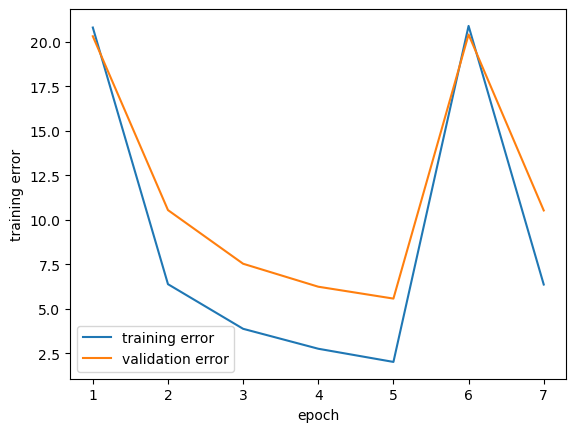

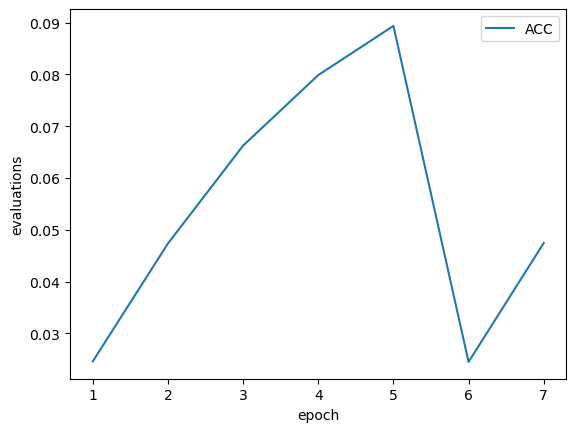

Saved training state to training.json
Loaded training state from training.json


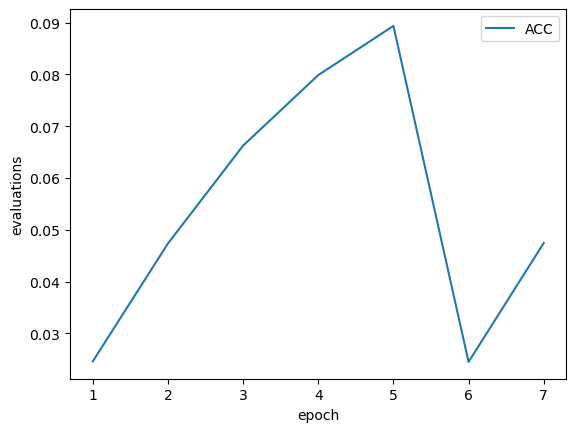

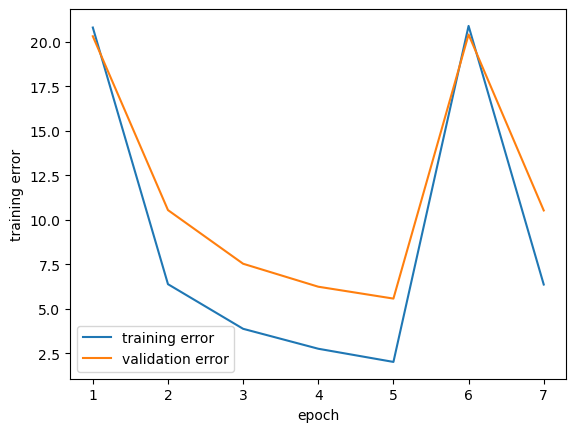

In [10]:
training.plot_losses()
training.plot_evaluations()
training.save_infos()
training = TrainingLoop(settings, MockTrainLogic(len(settings.train_data), settings.batch_size, delay=0.0, overfit=10 ), "training.json", [AccuracyEvaluator()])
training.load_infos()
training.plot_evaluations()
training.plot_losses()

In [8]:
#settings.print_after_steps = 1
training.current_epoch = 4
training.train(20)

Training trying_out for 20 epochs
Training on cpu
[21:22:44] Epoch 6/20, Ellapsed 00:01 seconds, Train Loss: 20.8823, Validation Loss: 20.4000 Evaluations: [('ACC', 0.0245048741242538)] ETA: 00:22
[21:22:46] Epoch 7/20, Ellapsed 00:03 seconds, Train Loss: 6.3697, Validation Loss: 10.5274 Evaluations: [('ACC', 0.04745950875913072)] ETA: 00:20


KeyboardInterrupt: 

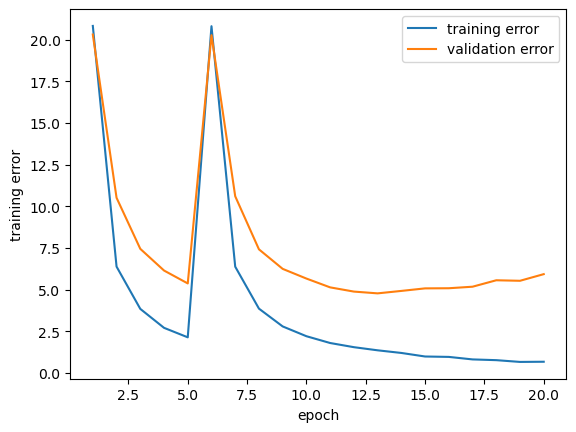

In [ ]:
def plot_losses(train_loss, val_loss):
    assert len(train_loss) == len(val_loss), "Train loss length and val loss length should be equal"
    epochs = len(train_loss)+1
    fig = plt.figure()
    plt.legend("training and validation error")
    plt.xlabel("epoch")
    plt.ylabel("training error")
    plt.plot(range(1, epochs), train_loss, label="training error")
    plt.plot(range(1, epochs), val_loss, label="validation error")
    plt.legend()
    plt.show()

plot_losses(training.tr_losses, training.val_losses)

In [ ]:
def show_image(image, label):
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"Label: {label}")
    
show_image(dt_train[799][0],dt_train.get_class_label(dt_train[799][1]))
show_image(dt_val[0][0],dt_val.get_class_label(dt_val[0][1]))

IndexError: list index out of range

In [ ]:
import random
for i in range(10):
    idx = abs(random.gauss(100, .1))
    print(i,idx)

0 99.9418941556243
1 99.82137241897459
2 99.99722225044839
3 99.90006899047438
4 99.97848849061482
5 99.9718959846959
6 100.0749465590112
7 99.96392531926236
8 99.92372433967068
9 100.05925539950456
